# Lab: Implementando SVM con Scikit-Learn

Nuestra tarea es predecir si un Apartamento debe ser Alquilado o Vendido según los atributos suministrados. 

## Importando librerias

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

Leyendo el dataset en Excel y grabarlo en una Dataframe pandas

In [2]:
filename='PrecioAptoRentaVenta.xlsx'
df = pd.read_excel(filename)
df.shape 

(1200, 8)

Comprobamos las dimensiones de los datos y veremos los primeros registros

In [3]:
df.head()

,estrato,nhab,area,precio,ingreanual,gastoanual,estcivil,venta
0,1,1,10,47,10.3,9.682,2,0
1,1,2,11,51,15.0,13.950,1,0
2,1,2,11,82,10.3,9.579,1,0
3,1,1,12,47,13.1,12.445,0,0
4,1,2,12,61,13.6,12.240,0,0


## Distribución estadísticas de los atributos 

In [4]:
df.describe()

,estrato,nhab,area,precio,ingreanual,gastoanual,estcivil,venta
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,2.783333,2.691667,107.194167,140.839167,20.219500,15.901259,0.998333,0.443333
std,1.415884,0.953426,46.706203,59.982816,14.025194,9.745651,0.811714,0.496986
min,1.000000,1.000000,10.000000,40.000000,9.100000,5.612000,0.000000,0.000000
25%,1.750000,2.000000,75.000000,92.750000,11.600000,9.975000,0.000000,0.000000
50%,3.000000,3.000000,105.000000,140.000000,13.800000,12.143000,1.000000,0.000000
75%,4.000000,3.000000,140.000000,176.000000,22.425000,16.563750,2.000000,1.000000
max,5.000000,4.000000,220.000000,300.000000,60.900000,51.765000,2.000000,1.000000


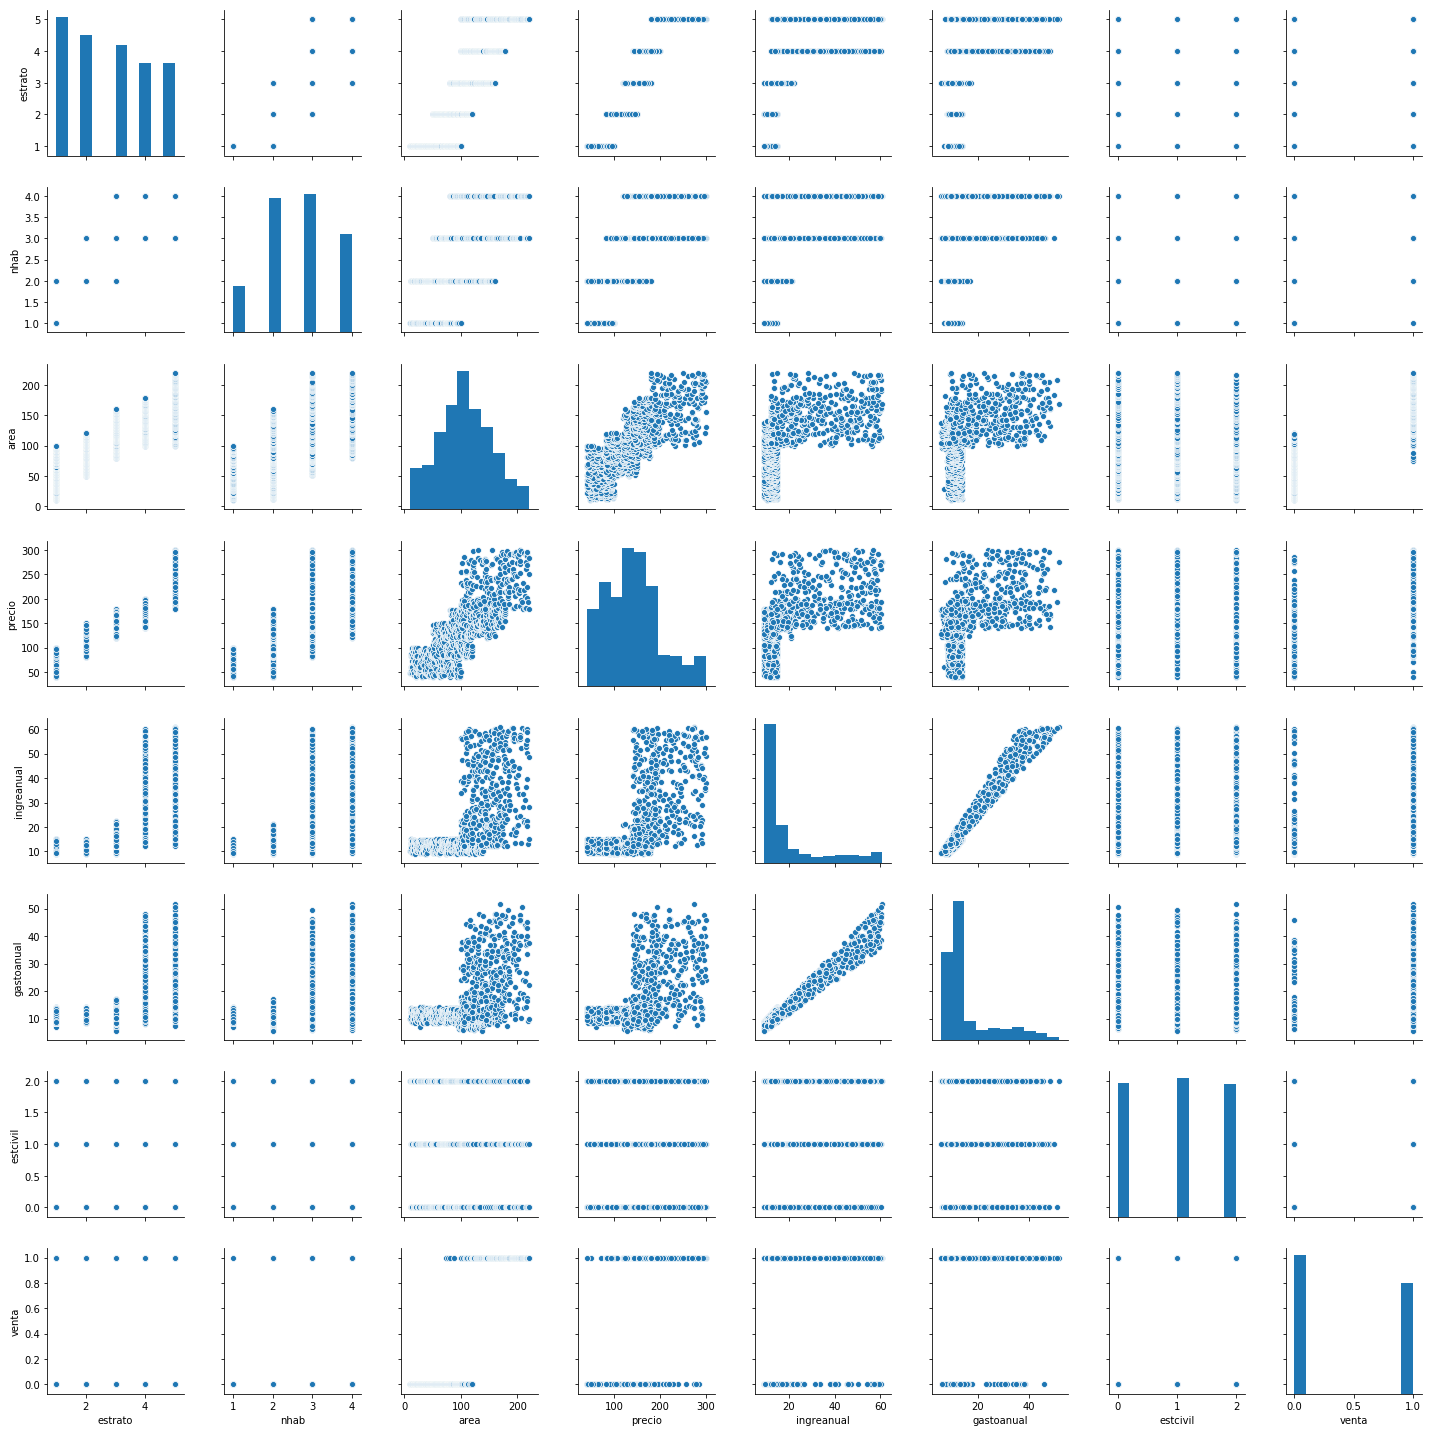

In [5]:
sns.pairplot(df, height=2.5)
plt.tight_layout()

## Procesando los datos

Para dividir los datos en atributos y etiquetas, ejecute el siguiente código:

In [6]:
X=df[['estrato', 'nhab', 'area', 'precio', 'ingreanual', 'gastoanual','estcivil']]
Y=df[['venta']]

## Graficamos según la etiqueta de Renta o Venta

In [7]:
colors = np.where(Y['venta']==0,'r','b')

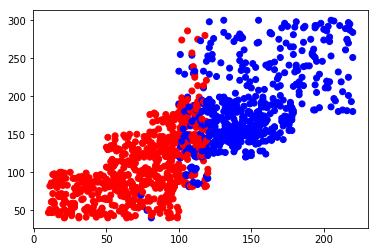

In [16]:
plt.scatter(X[['area']],X[['precio']], c=colors)
#plt.scatter(X[['area']],X[['gastoanual']], c=colors)
plt.show()

## Dividiendo el dataset en Training y Test

In [9]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20) 

## Entrenando el Modelo

El método fit de la clase SVC realiza el algoritmo en los datos de entrenamiento, ejecuta el siguiente código:

In [10]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 

c:\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Haciendo Predicciones 

Para hacer predicciones, se utiliza el método de predict de la clase SVC. Ejecuta el siguiente código:

In [11]:
y_pred = svclassifier.predict(X_test) 

## Evaluación del Modelo 

Las mediciones de *matriz de confusión, precision, recall y f1-score* son las métricas más utilizadas para las tareas de clasificación

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  

[[133   9]
 [ 13  85]]


f1-score = [2 x *precision* x *recall*] / [*precision* + *recall*]

In [13]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       142
           1       0.90      0.87      0.89        98

   micro avg       0.91      0.91      0.91       240
   macro avg       0.91      0.90      0.90       240
weighted avg       0.91      0.91      0.91       240



## Realizando nuevas Predicciones

Para los valores Estrato= 3, Num Hab=3, Area= 150, Precio=250

In [14]:
y_nuevo = svclassifier.predict([[3, 3, 115, 200, 30, 25, 2]]) 

In [15]:
print("Renta o Venta para el nuevo registro -->>", y_nuevo)

Renta o Venta para el nuevo registro -->> [0]
